# Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('../data/carInsurance_train.csv')

In [27]:
data[0:10]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
5,6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1
6,7,37,admin.,single,tertiary,0,1000,1,0,cellular,17,mar,1,-1,0,NaN,13:00:02,13:03:17,1
7,8,35,management,divorced,tertiary,0,538,1,0,NaN,12,may,4,-1,0,NaN,15:39:43,15:40:49,0
8,9,30,admin.,married,secondary,0,187,1,0,cellular,18,nov,1,-1,0,NaN,12:20:56,12:22:42,0
9,10,30,blue-collar,married,secondary,0,3,1,1,cellular,12,may,2,-1,0,NaN,09:22:20,09:27:46,0


In [28]:
len(data)

4000

In [30]:
len(data.columns)

19

# Distribution of target variables

* Number of positive examples accounts for 40% of the overall data and negative samples accounts for 60% of the data
* There is no class imbalance in the dataset


In [50]:
print(data.groupby('CarInsurance').size())
print((data.groupby('CarInsurance').size()/len(data))*100)

CarInsurance
0    2396
1    1604
dtype: int64
CarInsurance
0    59.9
1    40.1
dtype: float64


# Holding out 20% of the sample for test dataset

* Performing stratified sampling
* X_train, y_train - training dataset
* X_test, y_test - test dataset (hold-out)

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X = data.drop('CarInsurance', axis=1)
target = data['CarInsurance']
X_train, X_test, y_train, y_test = train_test_split(X, target,  test_size=0.2, random_state=1)

In [189]:
len(X_train)

3200

In [190]:
len(X_test)

800

# CallStart and CallEnd is converted to call duration


In [191]:
import datetime as dt


In [192]:
call_duration_arr = []
for index, row in X_train.iterrows():
    
    call_start = row['CallStart'] 
    call_end = row['CallEnd']
    call_start_hr = call_start.split(':')[0]
    call_start_min = call_start.split(':')[1]
    call_start_sec = call_start.split(':')[2]
    
    call_end_hr = call_end.split(':')[0]
    call_end_min = call_end.split(':')[1]
    call_end_sec = call_end.split(':')[2]
    
    call_start_dt = dt.datetime(2013,12,30,int(call_start_hr),int(call_start_min),int(call_start_sec))
    call_end_dt = dt.datetime(2013,12,30,int(call_end_hr),int(call_end_min),int(call_end_sec))

    call_duration = (call_end_dt-call_start_dt).total_seconds()
    call_duration_arr.append(call_duration)
    
X_train['call_duration'] = call_duration_arr

/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [193]:
X_train.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'call_duration'],
      dtype='object')

# Removing ID, CallStart and CallEnd column

* CallStart and CallEnd is already being converted to call_duration

In [194]:

if len(set(['Id', 'CallStart', 'CallEnd']) - set(list(X_train.columns)))<1:
    X_train = X_train.drop(['Id', 'CallStart', 'CallEnd'], axis=1)

In [195]:
X_train.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'call_duration'],
      dtype='object')

# Missing value Counts

In [196]:
print(X_train.isnull().sum())
print(X_train.isnull().sum()/len(X_train))

Age                    0
Job                   16
Marital                0
Education            130
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        724
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             2434
call_duration          0
dtype: int64
Age                 0.000000
Job                 0.005000
Marital             0.000000
Education           0.040625
Default             0.000000
Balance             0.000000
HHInsurance         0.000000
CarLoan             0.000000
Communication       0.226250
LastContactDay      0.000000
LastContactMonth    0.000000
NoOfContacts        0.000000
DaysPassed          0.000000
PrevAttempts        0.000000
Outcome             0.760625
call_duration       0.000000
dtype: float64


# Removing outcome column

* Missing value accounts for more than 75% of the sample size

In [197]:
if 'Outcome' in X_train.columns:
    X_train = X_train.drop(['Outcome'], axis=1)

In [198]:
X_train[0:4]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,call_duration
2996,37,technician,married,NaN,0,189,0,0,cellular,16,jun,2,-1,0,162.0
3295,55,blue-collar,married,secondary,0,2854,1,0,cellular,7,may,1,-1,0,312.0
2284,41,self-employed,single,NaN,0,426,1,0,NaN,19,jun,1,-1,0,75.0
2793,37,management,married,tertiary,0,3236,0,0,cellular,20,may,2,202,5,291.0


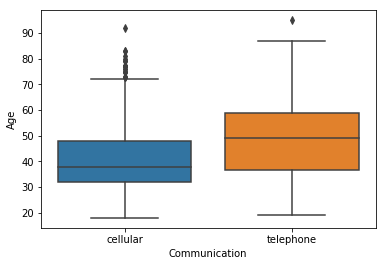

In [149]:
sns.boxplot(X_train['Communication'], X_train['Age'], )

(array([131., 829., 860., 548., 456., 283.,  38.,  37.,  16.,   2.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

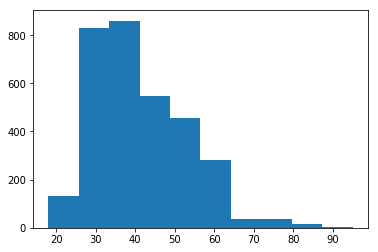

In [150]:
plt.hist(X_train['Age'])

(array([2.036e+03, 7.160e+02, 2.530e+02, 1.120e+02, 5.200e+01, 1.700e+01,
        1.000e+01, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([   5. ,  329.8,  654.6,  979.4, 1304.2, 1629. , 1953.8, 2278.6,
        2603.4, 2928.2, 3253. ]),
 <a list of 10 Patch objects>)

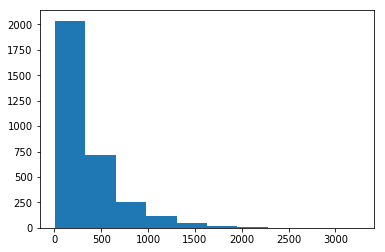

In [154]:
plt.hist(X_train['call_duration'])

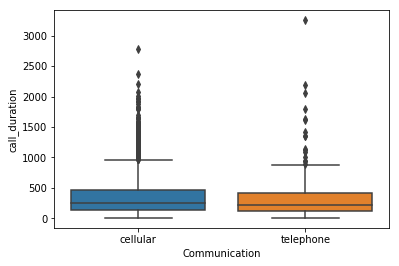

In [153]:
sns.boxplot(X_train['Communication'], X_train['call_duration'], )

In [152]:
pd.crosstab(X_train['Job'], X_train['Communication'])

Communication,cellular,telephone
Job,,
admin.,267,26
blue-collar,346,29
entrepreneur,68,11
housemaid,52,13
management,580,31
retired,136,48
self-employed,77,7
services,168,12
student,85,9


In [142]:
X_train['Education'].unique()

array([nan, 'secondary', 'tertiary', 'primary'], dtype=object)

In [143]:
X_train['Job'].unique()

array(['technician', 'blue-collar', 'self-employed', 'management',
       'retired', 'services', 'admin.', 'housemaid', 'entrepreneur',
       'student', 'unemployed', nan], dtype=object)